In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from function_preprocess import process_text # preprocess_postag_thesea
import pandas as pd
import numpy as np
from underthesea import word_tokenize, pos_tag, sent_tokenize, sentiment
import re
import demoji
from pyvi import ViPosTagger, ViTokenizer
import string
from wordcloud import WordCloud
import plotly.express as px

In [4]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, MinMaxScaler

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import glob
import os 
from tqdm.auto import tqdm
tqdm.pandas()

In [6]:
pd.option_context('mode.use_inf_as_na', True)

In [7]:
import plotly.io as pio
pio.renderers.default = 'notebook'

In [8]:
def extract_adjectives_vietnamese(comment):
    # Perform part-of-speech tagging
    tagged_words = pos_tag(comment)

    # Extract adjectives
    adjectives = [word for word, pos in tagged_words if pos == 'A']

    return adjectives

# Load Some Data to preprocess Vietnamese languages

- Emoji

In [9]:
with open('../DATA_shopeefood/files/emojicon.txt', 'r', encoding="utf8") as file:
    emoji_lst = file.read().split('\n')
    emoji_dict = {}
    for line in emoji_lst:
        key, value = line.split('\t')
        emoji_dict[key] = str(value)

- Teen code

In [10]:
with open('../DATA_shopeefood/files/teencode.txt', 'r', encoding="utf8") as file:
    teen_lst = file.read().split('\n')
    teen_dict = {}
    for line in teen_lst:
        key, value = line.split('\t')
        teen_dict[key] = str(value)

In [11]:
#teen_dict

- Load transalte English => vietnamese

In [12]:
with open('../DATA_shopeefood/files/english-vnmese.txt', 'r', encoding="utf8") as file:
    eng_lst = file.read().split('\n')
    eng_dict = {}
    for line in eng_lst:
        key, value = line.split('\t')
        eng_dict[key] = str(value)

In [13]:
#eng_dict

- Load worng words

In [14]:
with open('../DATA_shopeefood/files/wrong-word.txt', 'r', encoding="utf8") as file:
    wrong_lst = file.read().split('\n')

In [15]:
#wrong_lst

- Load Stopwords

In [16]:
with open('../DATA_shopeefood/files/vietnamese-stopwords.txt', 'r', encoding="utf8") as file:
    stop_lst = file.read().split('\n')

In [17]:
def process_special_word(text):
    # có thể có nhiều từ đặc biệt cần ráp lại với nhau
    new_text = ''
    text_lst = text.split()
    i= 0
    # không, chẳng, chả...
    if 'không' in text_lst:
        while i <= len(text_lst) - 1:
            word = text_lst[i]
            #print(word)
            #print(i)
            if  word == 'không':
                next_idx = i+1
                if next_idx <= len(text_lst) -1:
                    word = word +'_'+ text_lst[next_idx]
                i= next_idx + 1
            else:
                i = i+1
            new_text = new_text + word + ' '
    else:
        new_text = text
    return new_text.strip()

In [18]:
# Hàm để chuẩn hóa các từ có ký tự lặp
def normalize_repeated_characters(text):
    # Thay thế mọi ký tự lặp liên tiếp bằng một ký tự đó
    # Ví dụ: "ngonnnn" thành "ngon", "thiệtttt" thành "thiệt"
    return re.sub(r'(.)\1+', r'\1', text)

In [19]:
def remove_stopword(text, stopwords):
    ###### REMOVE stop words
    document = ' '.join('' if word in stopwords else word for word in text.split())
    #print(document)
    ###### DEL excess blank space
    document = regex.sub(r'\s+', ' ', document).strip()
    return document

In [20]:
def process_postag_thesea(text):
    new_document = ''
    for sentence in sent_tokenize(text):
        sentence = sentence.replace('.','')
        ###### POS tag
        lst_word_type = ['N','Np','A','AB','V','VB','VY','R']
        # lst_word_type = ['A','AB','V','VB','VY','R']
        sentence = ' '.join( word[0] if word[1].upper() in lst_word_type else '' for word in pos_tag(process_special_word(word_tokenize(sentence, format="text"))))
        new_document = new_document + sentence + ' '
        
    # DEL excess blank space
    new_document = re.sub(r'\s+', ' ', new_document).strip()

    # Remove duplicated characters
    new_document = normalize_repeated_characters(text=new_document)

    # Remove stop words
    # new_document = remove_stopword(text=new_document,stopwords=stop_lst)
    return new_document

# Overview Data

In [21]:
review_df = pd.read_csv('../DATA_shopeefood/2_Reviews.csv')
review_df

,ID,User,Time,Rating,Comment,IDRestaurant
0,1,PHAN LE,20/12/2023 21:13,5.2,"Gà chiên còn sống, rất tanh. Khủng khiép",1
1,2,Thúy,25/9/2023 15:43,5.0,"Đã ăn qua rồi, ăn ok ạ",1
2,3,Quyên Quyên,24/6/2023 11:11,5.0,Đã thư rất ngon,1
3,4,Phương Thảo,22/12/2022 14:58,1.0,Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...,1
4,5,Quỳnh Nguyễn,23/9/2022 22:40,4.2,"21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...",1
...,...,...,...,...,...,...
29954,29955,Trannuhamy,26/10/2020 12:16,7.0,Đặt quán bún thái này trong chương trình của c...,1595
29955,29956,Phương,1/6/2021 15:34,10.0,"Bánh ngon, nóng.\nGiao hàng nhanh.\nGiá phải c...",1609
29956,29957,Tú,31/1/2021 14:29,3.4,Phục vụ quá tệ\nPizza xúc xích double phô mai ...,1609
29957,29958,Hoàng Hậu Mai,27/10/2020 18:06,7.6,Đang thèm gà rán thì lướt trúng ngay combo gà ...,1609


In [26]:
import io
from contextlib import redirect_stdout

# Create a StringIO object to capture printed output
string_buffer = io.StringIO()

In [27]:
# Redirect printed output to the StringIO object
with redirect_stdout(string_buffer):
    # Your code that prints data
    review_df.info()

In [28]:
# Get the captured output as a string
captured_output = string_buffer.getvalue()

# Print the captured output
print("Captured Output:")
print(captured_output)

Captured Output:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29959 entries, 0 to 29958
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29959 non-null  int64  
 1   User          29959 non-null  object 
 2   Time          29959 non-null  object 
 3   Rating        29959 non-null  float64
 4   Comment       29958 non-null  object 
 5   IDRestaurant  29959 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.4+ MB



# EDA:

## Review dataframe

In [24]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29959 entries, 0 to 29958
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            29959 non-null  int64  
 1   User          29959 non-null  object 
 2   Time          29959 non-null  object 
 3   Rating        29959 non-null  float64
 4   Comment       29958 non-null  object 
 5   IDRestaurant  29959 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.4+ MB


- Remove nan and transform to datetime

In [36]:
clean_review_df = review_df.dropna().reset_index(drop=True)
clean_review_df['date_time'] = pd.to_datetime(clean_review_df['Time'],format='%d/%m/%Y %H:%M')

- Check unique values and transform to ID

In [37]:
clean_review_df.nunique()

ID              29958
User            14027
Time            29098
Rating             47
Comment         28474
IDRestaurant     1174
date_time       29098
dtype: int64

In [38]:
name_values = clean_review_df['User'].values
label_enc = LabelEncoder()
clean_review_df['user_id'] = label_enc.fit_transform(name_values)

### Numeric data

In [39]:
clean_review_df

,ID,User,Time,Rating,Comment,IDRestaurant,date_time,user_id
0,1,PHAN LE,20/12/2023 21:13,5.2,"Gà chiên còn sống, rất tanh. Khủng khiép",1,2023-12-20 21:13:00,8670
1,2,Thúy,25/9/2023 15:43,5.0,"Đã ăn qua rồi, ăn ok ạ",1,2023-09-25 15:43:00,11063
2,3,Quyên Quyên,24/6/2023 11:11,5.0,Đã thư rất ngon,1,2023-06-24 11:11:00,9541
3,4,Phương Thảo,22/12/2022 14:58,1.0,Tệ .. mua mang về cho 1 gói tương ớt. Và xin t...,1,2022-12-22 14:58:00,9112
4,5,Quỳnh Nguyễn,23/9/2022 22:40,4.2,"21h30...2 đứa nhỏ kêu đói, sau 1 hồi bình loạn...",1,2022-09-23 22:40:00,9651
...,...,...,...,...,...,...,...,...
29953,29955,Trannuhamy,26/10/2020 12:16,7.0,Đặt quán bún thái này trong chương trình của c...,1595,2020-10-26 12:16:00,11730
29954,29956,Phương,1/6/2021 15:34,10.0,"Bánh ngon, nóng.\nGiao hàng nhanh.\nGiá phải c...",1609,2021-06-01 15:34:00,9033
29955,29957,Tú,31/1/2021 14:29,3.4,Phục vụ quá tệ\nPizza xúc xích double phô mai ...,1609,2021-01-31 14:29:00,12594
29956,29958,Hoàng Hậu Mai,27/10/2020 18:06,7.6,Đang thèm gà rán thì lướt trúng ngay combo gà ...,1609,2020-10-27 18:06:00,3401


In [48]:
str(clean_review_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29958 entries, 0 to 29957
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            29958 non-null  int64         
 1   User          29958 non-null  object        
 2   Time          29958 non-null  object        
 3   Rating        29958 non-null  float64       
 4   Comment       29958 non-null  object        
 5   IDRestaurant  29958 non-null  int64         
 6   date_time     29958 non-null  datetime64[ns]
 7   user_id       29958 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(3)
memory usage: 1.7+ MB


'None'

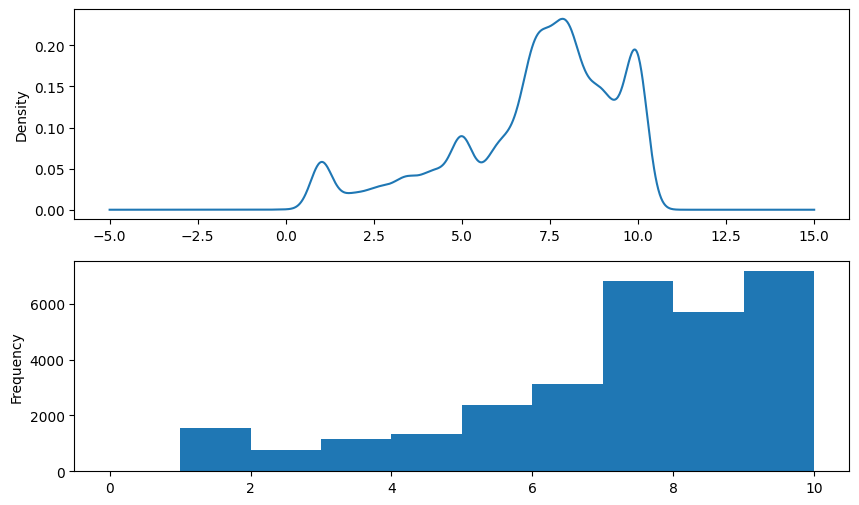

In [29]:
fig,ax = plt.subplots(2,1,figsize=(10,6))
clean_review_df['Rating'].plot(kind='kde',ax=ax[0])
clean_review_df['Rating'].plot(kind='hist',ax=ax[1])
plt.savefig('rating_plot.png')
plt.show()

- Apply min max scaler 

In [23]:
mm_scaler = MinMaxScaler(feature_range=(1,10))
clean_review_df[['rating_scaler']] = mm_scaler.fit_transform(X=clean_review_df[['Rating']])

### Preprocess review

In [24]:
reviews = review_df['Comment']

In [26]:
tqdm.pandas(desc='Process Text') 
clean_text = clean_review_df['Comment'].progress_apply(lambda x: process_text(text=x,
                                                                        emoji_dict=emoji_dict, 
                                                                        teen_dict=teen_dict,
                                                                        wrong_lst=wrong_lst,
                                                                        eng_vn_dict=eng_dict))

Process Text:   0%|          | 0/29958 [00:00<?, ?it/s]

In [27]:
tqdm.pandas(desc='Process Text') 
clean_thesis_text = clean_text.progress_apply(lambda x: process_postag_thesea(text=x))

Process Text:   0%|          | 0/29958 [00:00<?, ?it/s]

In [28]:
clean_review_df['clean_review'] = clean_thesis_text

- Try sentiment review by underthesea

In [29]:
tqdm.pandas(desc='Process Text') 
result_understhesis = clean_thesis_text.progress_apply(lambda x: sentiment(x))

Process Text:   0%|          | 0/29958 [00:00<?, ?it/s]

In [30]:
clean_review_df['under_sentiment'] = result_understhesis

### Combine all and drop uneccessary columns

In [43]:
clean_review_df = clean_review_df.drop(columns=['ID', 'User', 'Time', 'Rating','Comment'],errors='ignore')

In [44]:
clean_review_df.head()

,IDRestaurant,date_time,user_id,rating_scaler,clean_review,under_sentiment,rating_category,sentiment_encode,rating_encode,label
0,1,2023-12-20 21:13:00,8670,5.68,gà chiên còn sống rất,negative,medium,0.0,2.0,2.0
1,1,2023-09-25 15:43:00,11063,5.50,đã ăn ăn đồng_ý,negative,medium,0.0,2.0,2.0
2,1,2023-06-24 11:11:00,9541,5.50,đã thư rất ngon,positive,medium,1.0,2.0,2.0
3,1,2022-12-22 14:58:00,9112,1.90,về gói thêm khách ơ lại ăn về lại phải thêm ph...,negative,bad,0.0,0.0,0.0
4,1,2022-09-23 22:40:00,9651,4.78,nhỏ kêu đói hồi bình_loạn là đang háo_hức vừa ...,negative,medium,0.0,2.0,2.0


- Divide rating scaler into 3 categories: good, bad, neutral

In [33]:
labels = ['bad', 'medium', 'good']
interval_rate = pd.cut(x=clean_review_df['rating_scaler'],bins=3,labels=labels)

In [34]:
clean_review_df['rating_category'] = interval_rate

In [35]:
clean_review_df.head()

,IDRestaurant,date_time,user_id,rating_scaler,clean_review,under_sentiment,rating_category
0,1,2023-12-20 21:13:00,8670,5.68,gà chiên còn sống rất,negative,medium
1,1,2023-09-25 15:43:00,11063,5.50,đã ăn ăn đồng_ý,negative,medium
2,1,2023-06-24 11:11:00,9541,5.50,đã thư rất ngon,positive,medium
3,1,2022-12-22 14:58:00,9112,1.90,về gói thêm khách ơ lại ăn về lại phải thêm ph...,negative,bad
4,1,2022-09-23 22:40:00,9651,4.78,nhỏ kêu đói hồi bình_loạn là đang háo_hức vừa ...,negative,medium


In [36]:
od = OrdinalEncoder()
clean_review_df[['sentiment_encode', 'rating_encode']] =  od.fit_transform(clean_review_df[['under_sentiment','rating_category']])

In [37]:
od.categories_

[array(['negative', 'positive', None], dtype=object),
 array(['bad', 'good', 'medium'], dtype=object)]

In [38]:
label_ls = []
for s_e, r_e in clean_review_df[['sentiment_encode', 'rating_encode']].itertuples(index=False):
    if s_e == 0 and r_e == 0:
        label = 0
        label_ls.append(label)
    elif s_e == 1 and r_e == 1:
        label = 1
        label_ls.append(label)
    elif (s_e == 2 and  r_e == 1) or (s_e == 2 and  r_e == 0):
        label = r_e
        label_ls.append(label)
    else:
        label = 2
        label_ls.append(label)

In [39]:
clean_review_df['label'] = label_ls

In [40]:
clean_review_df['label'].value_counts(normalize=True)

label
1.0    0.558015
2.0    0.368416
0.0    0.073570
Name: proportion, dtype: float64

There is imbalance data between 3 labels  

In [45]:
clean_review_df.head()

,IDRestaurant,date_time,user_id,rating_scaler,clean_review,under_sentiment,rating_category,sentiment_encode,rating_encode,label
0,1,2023-12-20 21:13:00,8670,5.68,gà chiên còn sống rất,negative,medium,0.0,2.0,2.0
1,1,2023-09-25 15:43:00,11063,5.50,đã ăn ăn đồng_ý,negative,medium,0.0,2.0,2.0
2,1,2023-06-24 11:11:00,9541,5.50,đã thư rất ngon,positive,medium,1.0,2.0,2.0
3,1,2022-12-22 14:58:00,9112,1.90,về gói thêm khách ơ lại ăn về lại phải thêm ph...,negative,bad,0.0,0.0,0.0
4,1,2022-09-23 22:40:00,9651,4.78,nhỏ kêu đói hồi bình_loạn là đang háo_hức vừa ...,negative,medium,0.0,2.0,2.0


In [46]:
clean_review_df.to_csv(path_or_buf='../Clean_data/clean_review_data.csv',index=False)

## Restaurant dataframe

In [73]:
food_shop_df = pd.read_csv('../DATA_shopeefood/1_Restaurants.csv')
food_shop_df

,ID,Restaurant,Address,Time,Price,District
0,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",00:00 - 23:59,50.000 - 200.000,Quận 1
1,2,Cháo Trắng - Cháo Thịt Bằm BK House - Phạm Viế...,"112B Phạm Viết Chánh, P. Nguyễn Cư Trinh, Quận...",00:00 - 23:59,5.000 - 40.000,Quận 1
2,3,Texas Chicken - Nguyễn Thái Học,"115 Nguyễn Thái Học , Quận 1, TP. HCM",NaN,30.000 - 300.000,Quận 1
3,4,Bếp Chay 365,"Tầng 1, 35 Nguyễn Văn Tráng, P. Bến Thành, Quậ...",NaN,15.000 - 50.000,Quận 1
4,5,Bánh Canh Cua Linh,"80A Điện Biên Phủ, P. Đa Kao, Quận 1, TP. HCM",06:20 - 22:00,25.000 - 35.000,Quận 1
...,...,...,...,...,...,...
1617,1618,Món Ăn Miền Trung - Thắng Lợi,"180/1C Tô Ký - Khu Phố 2, P. Tân Chánh Hiệp, Q...",NaN,19.000 - 79.000,Quận 12
1618,1619,Bánh Mì Bò Nướng Cô Ba - Hiệp Thành 17,"284 Hiệp Thành 17, P. Hiệp Thành, Quận 12, TP....",05:30 - 21:00,0 - 0,Quận 12
1619,1620,Anh Anh Quán - Cơm Tấm Sườn Ốp La & Bún Thịt N...,"89 Trương Thị Hoa, P. Tân Thới Hiệp, Quận 12, ...",NaN,30.000 - 36.000,Quận 12
1620,1621,Phú Mập - Cháo Lòng - Lê Văn Khương,"756 Lê Văn Khương, P. Thới An, Quận 12, TP. HCM",NaN,0 - 0,Quận 12


In [74]:
food_shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1622 entries, 0 to 1621
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          1622 non-null   int64 
 1   Restaurant  1622 non-null   object
 2   Address     1622 non-null   object
 3   Time        773 non-null    object
 4   Price       1622 non-null   object
 5   District    1622 non-null   object
dtypes: int64(1), object(5)
memory usage: 76.2+ KB


### Check duplicate and drop

In [75]:
food_shop_df[food_shop_df.duplicated(subset=['Restaurant','Address'],keep=False)].sort_values(by=['Restaurant'])

,ID,Restaurant,Address,Time,Price,District
1442,1443,Bia Tươi Sài Gòn - Chè Bưởi Lucy,"83/23G Hòa Hưng, P. 12, Quận 10, TP. HCM",08:00 - 22:00,15.000 - 25.000,Quận 10
1455,1456,Bia Tươi Sài Gòn - Chè Bưởi Lucy,"83/23G Hòa Hưng, P. 12, Quận 10, TP. HCM",08:00 - 22:00,15.000 - 25.000,Quận 10
1449,1450,Bún Bò Huế Ba Nghị,"466 Nguyễn Tri Phương, P. 9, Quận 10, TP. HCM",NaN,30.000 - 40.000,Quận 10
1436,1437,Bún Bò Huế Ba Nghị,"466 Nguyễn Tri Phương, P. 9, Quận 10, TP. HCM",NaN,30.000 - 40.000,Quận 10
1454,1455,Bún Chả 1986,"30 Cửu Long, P. 15, Quận 10, TP. HCM",07:30 - 14:30 | 17:00 - 21:30,35.000 - 50.000,Quận 10
1440,1441,Bún Chả 1986,"30 Cửu Long, P. 15, Quận 10, TP. HCM",07:30 - 14:30 | 17:00 - 21:30,35.000 - 50.000,Quận 10
1357,1358,Bún Đậu Mắm Tôm H-Famil - Man Thiện,"202A3 Man Thiện, P. Tăng Nhơn Phú A, Quận 9, T...",10:00 - 13:00 | 16:00 - 21:00,40.000 - 60.000,Quận 9
1380,1381,Bún Đậu Mắm Tôm H-Famil - Man Thiện,"202A3 Man Thiện, P. Tăng Nhơn Phú A, Quận 9, T...",10:00 - 13:00 | 16:00 - 21:00,40.000 - 60.000,Quận 9
1377,1378,Cơm Gà Xối Nước Mắm Song Anh - Đường D3,"10 Đường D3, KDC Kiến Á, P. Phước Long B, Quận...",07:00 - 13:00,10.000 - 500.000,Quận 9
1390,1391,Cơm Gà Xối Nước Mắm Song Anh - Đường D3,"10 Đường D3, KDC Kiến Á, P. Phước Long B, Quận...",07:00 - 13:00,10.000 - 500.000,Quận 9


In [76]:
clean_res_df = food_shop_df.drop_duplicates(subset=['Restaurant','Address'])

### Preprocess district, price, time

In [77]:
import warnings
warnings.filterwarnings('ignore')

In [78]:
clean_res_df['district'] = clean_res_df['District'].str.extract(pat=r'(\d+)',expand=False).astype(int)

In [79]:
clean_res_df[['price_min','price_max']] = clean_res_df['Price'].str.extract(pat=r'(\d+\.\d{3})\s-\s(\d+\.\d{3})',expand=True)
clean_res_df['price_max'] = clean_res_df['price_max'].str.replace(pat='.',repl='').astype(float)
clean_res_df['price_min'] = clean_res_df['price_min'].str.replace(pat='.',repl='').astype(float)

In [80]:
clean_res_df[['start_time','end_time']] =  clean_res_df['Time'].str.extract(pat=r'(\d{2}:\d{2})\s-\s(\d{2}:\d{2})',expand=True)

In [81]:
add_ls = clean_res_df['Address'].str.split(',').to_list()
add_new_ls = [[v.strip() for v in res] for res in add_ls]

### Drop some uneccessary column

In [82]:
clean_res_df  = clean_res_df.drop(columns=['Time','Price','District'])

In [83]:
clean_res_df.head()

,ID,Restaurant,Address,district,price_min,price_max,start_time,end_time
0,1,Gà Rán & Burger McDonald's Đa Kao,"2 - 6 Bis Điện Biên Phủ, Quận 1, TP. HCM",1,50000.0,200000.0,00:00,23:59
1,2,Cháo Trắng - Cháo Thịt Bằm BK House - Phạm Viế...,"112B Phạm Viết Chánh, P. Nguyễn Cư Trinh, Quận...",1,5000.0,40000.0,00:00,23:59
2,3,Texas Chicken - Nguyễn Thái Học,"115 Nguyễn Thái Học , Quận 1, TP. HCM",1,30000.0,300000.0,NaN,NaN
3,4,Bếp Chay 365,"Tầng 1, 35 Nguyễn Văn Tráng, P. Bến Thành, Quậ...",1,15000.0,50000.0,NaN,NaN
4,5,Bánh Canh Cua Linh,"80A Điện Biên Phủ, P. Đa Kao, Quận 1, TP. HCM",1,25000.0,35000.0,06:20,22:00


In [84]:
add_ls = clean_res_df['Address'].str.split(',').to_list()
add_new_ls = [[v.strip() for v in res] for res in add_ls]

# STREET
street_compile = re.compile(pattern=r'^\d+\w')
street_ls = []

# WARD
ward_compile = re.compile(pattern=r'^P\.')
ward_ls = []

# DISTRICT
district_compile = re.compile(pattern=r'^(Quận)|(Thủ Đức)')
dis_ls = []

for add in add_new_ls:
    # Street
    street = ' '.join(list(set([v if street_compile.search(v) else add[0] for v in add])))
    street_ls.append(street)

    # Ward
    ward = ' '.join(list(set([v if ward_compile.search(v) else '' for v in add])))
    ward_ls.append(ward)

    # District
    dis = ''.join(list(set([v if district_compile.search(v) else '' for v in add])))
    dis_ls.append(dis)

# Check 
print("Length of Street_ls", len(street_ls))
print("Length of WARD_ls", len(ward_ls))
print("Length of dist_ls", len(dis_ls))

Length of Street_ls 1605
Length of WARD_ls 1605
Length of dist_ls 1605


In [85]:
clean_res_df['street'] = street_ls
clean_res_df['ward'] = ward_ls
clean_res_df = clean_res_df.drop(columns=['Address'])

In [86]:
feat = ['ID', 'Restaurant', 'street', 'ward', 'district', 'price_max', 'price_min', 'start_time','end_time']
clean_res_df[feat]

,ID,Restaurant,street,ward,district,price_max,price_min,start_time,end_time
0,1,Gà Rán & Burger McDonald's Đa Kao,2 - 6 Bis Điện Biên Phủ,,1,200000.0,50000.0,00:00,23:59
1,2,Cháo Trắng - Cháo Thịt Bằm BK House - Phạm Viế...,112B Phạm Viết Chánh,P. Nguyễn Cư Trinh,1,40000.0,5000.0,00:00,23:59
2,3,Texas Chicken - Nguyễn Thái Học,115 Nguyễn Thái Học,,1,300000.0,30000.0,NaN,NaN
3,4,Bếp Chay 365,Tầng 1 35 Nguyễn Văn Tráng,P. Bến Thành,1,50000.0,15000.0,NaN,NaN
4,5,Bánh Canh Cua Linh,80A Điện Biên Phủ,P. Đa Kao,1,35000.0,25000.0,06:20,22:00
...,...,...,...,...,...,...,...,...,...
1617,1618,Món Ăn Miền Trung - Thắng Lợi,180/1C Tô Ký - Khu Phố 2,P. Tân Chánh Hiệp,12,79000.0,19000.0,NaN,NaN
1618,1619,Bánh Mì Bò Nướng Cô Ba - Hiệp Thành 17,284 Hiệp Thành 17,P. Hiệp Thành,12,NaN,NaN,05:30,21:00
1619,1620,Anh Anh Quán - Cơm Tấm Sườn Ốp La & Bún Thịt N...,89 Trương Thị Hoa,P. Tân Thới Hiệp,12,36000.0,30000.0,NaN,NaN
1620,1621,Phú Mập - Cháo Lòng - Lê Văn Khương,756 Lê Văn Khương,P. Thới An,12,NaN,NaN,NaN,NaN


In [87]:
clean_res_df[feat].to_csv('../Clean_data/clean_restaurant.csv',index=False)

## EDA DEEPER:

In [29]:
clean_res_df = pd.read_csv(filepath_or_buffer='../Clean_data/clean_restaurant.csv')
clean_review_df = pd.read_csv(filepath_or_buffer='../Clean_data/clean_review_data.csv')
final_df = pd.read_csv("../Clean_data/combine_review_res.csv")

In [32]:
feat = ['ID', 'Restaurant', 'street', 'ward', 'district', 'start_time',
       'end_time', 'IDRestaurant', 'avg_price','type_restaurant']
final_df[feat].head()

,ID,Restaurant,street,ward,district,start_time,end_time,IDRestaurant,avg_price,type_restaurant
0,1,Gà Rán & Burger McDonald's Đa Kao,2 - 6 Bis Điện Biên Phủ,NaN,1,00:00,23:59,1,125000.0,Casual
1,1,Gà Rán & Burger McDonald's Đa Kao,2 - 6 Bis Điện Biên Phủ,NaN,1,00:00,23:59,1,125000.0,Casual
2,1,Gà Rán & Burger McDonald's Đa Kao,2 - 6 Bis Điện Biên Phủ,NaN,1,00:00,23:59,1,125000.0,Casual
3,1,Gà Rán & Burger McDonald's Đa Kao,2 - 6 Bis Điện Biên Phủ,NaN,1,00:00,23:59,1,125000.0,Casual
4,1,Gà Rán & Burger McDonald's Đa Kao,2 - 6 Bis Điện Biên Phủ,NaN,1,00:00,23:59,1,125000.0,Casual


In [31]:
clean_review_df.head()

,IDRestaurant,date_time,user_id,rating_scaler,clean_review,under_sentiment,rating_category,sentiment_encode,rating_encode,label
0,1,2023-12-20 21:13:00,8670,5.68,gà chiên còn sống rất,negative,medium,0.0,2.0,2.0
1,1,2023-09-25 15:43:00,11063,5.50,đã ăn ăn đồng_ý,negative,medium,0.0,2.0,2.0
2,1,2023-06-24 11:11:00,9541,5.50,đã thư rất ngon,positive,medium,1.0,2.0,2.0
3,1,2022-12-22 14:58:00,9112,1.90,về gói thêm khách ơ lại ăn về lại phải thêm ph...,negative,bad,0.0,0.0,0.0
4,1,2022-09-23 22:40:00,9651,4.78,nhỏ kêu đói hồi bình_loạn là đang háo_hức vừa ...,negative,medium,0.0,2.0,2.0


<Axes: xlabel='label', ylabel='count'>

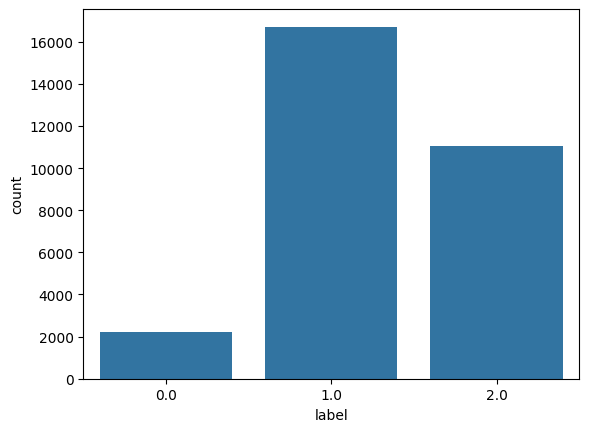

In [33]:
sns.countplot(data=clean_review_df,x='label')

In [32]:
positive_review_df = clean_review_df[clean_review_df.label==1]
negative_review_df = clean_review_df[clean_review_df.label==0]
neutral_review_df = clean_review_df[clean_review_df.label==2]

### Positive

In [52]:
#positive_review_df['clean_review']

In [ ]:
full_pos_adj_word = []
for k, text in tqdm(positive_review_df['clean_review'].items(),"Extract Adjective word"):
    if isinstance(text,str):
        word_ls = extract_adjectives_vietnamese(text)
        full_pos_adj_word.extend(word_ls)

In [49]:
#full_pos_adj_word

In [50]:
pos_comments = ' '.join(full_pos_adj_word)
        
#Generate word cloud from comments
wc_pos = WordCloud(background_color='white',
                   collocations=False,
                   max_words=50).generate(pos_comments)

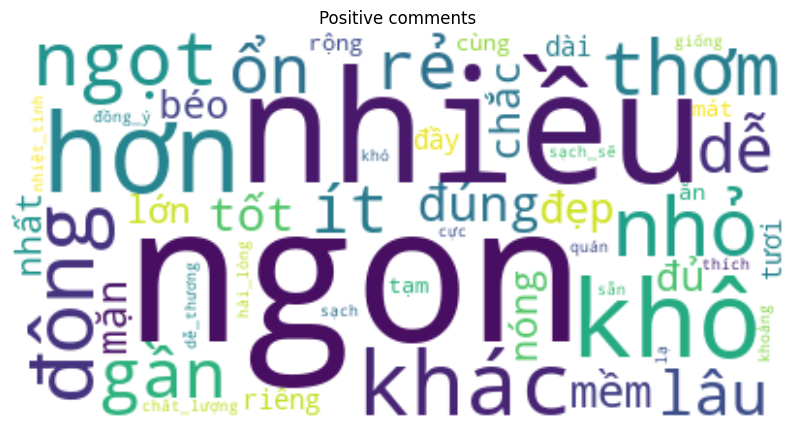

In [51]:
#display
plt.figure(figsize=(10,10))
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive comments')
plt.show()

### Negative

In [53]:
full_neg_adj_word = []
for k, text in tqdm(negative_review_df['clean_review'].items(),"Extract Adjective word"):
    if isinstance(text,str):
        word_ls = extract_adjectives_vietnamese(text)
        full_neg_adj_word.extend(word_ls)

Extract Adjective word: 0it [00:00, ?it/s]

In [54]:
neg_comments = ' '.join(full_neg_adj_word)
        
#Generate word cloud from comments
wc_neg = WordCloud(background_color='white',collocations=False,
                    max_words=50).generate(neg_comments)

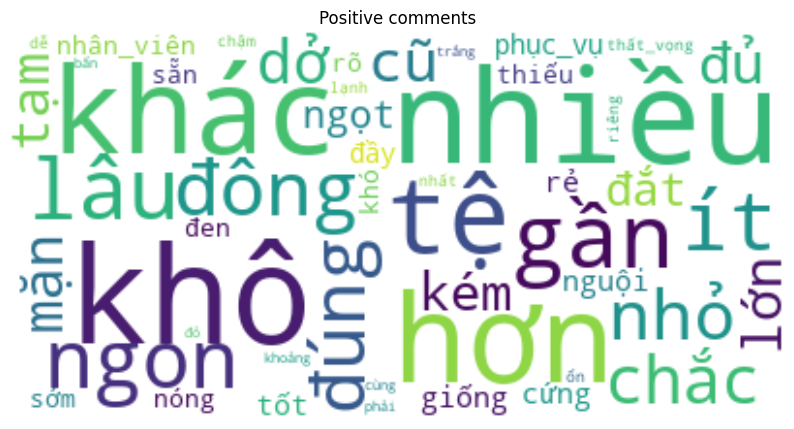

In [55]:
#display
plt.figure(figsize=(10,10))
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Positive comments')
plt.show()

### Neutral

In [57]:
full_neutral_adj_word = []
for k, text in tqdm(neutral_review_df['clean_review'].items(),"Extract Adjective word"):
    if isinstance(text,str):
        word_ls = extract_adjectives_vietnamese(text)
        full_neutral_adj_word.extend(word_ls)

Extract Adjective word: 0it [00:00, ?it/s]

In [131]:
neutral_comments = ' '.join(full_neutral_adj_word)
        
#Generate word cloud from comments
wc_neu = WordCloud(background_color='white',collocations=False,
                    max_words=50).generate(neutral_comments)

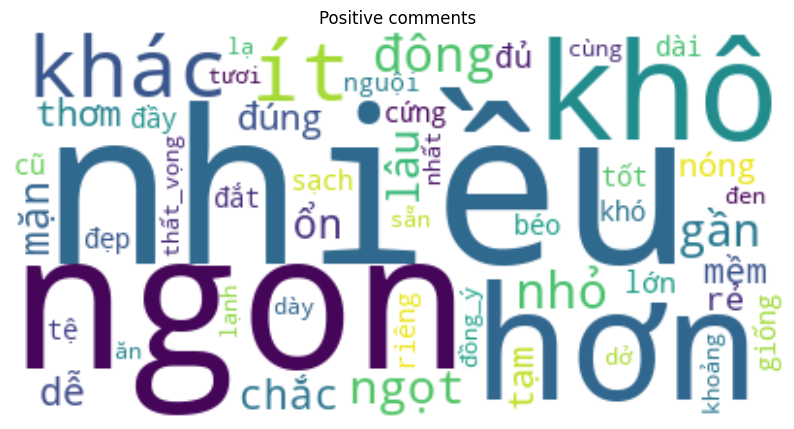

In [132]:
#display
plt.figure(figsize=(10,10))
plt.imshow(wc_neu, interpolation='bilinear')
plt.axis('off')
plt.title('Positive comments')
plt.show()

### Check rate score by district:

In [16]:
#clean_review_df

In [89]:
combined_df = pd.merge(left=clean_res_df,left_on='ID',
                       right=clean_review_df,right_on='IDRestaurant',how='inner')
combined_df['result'] = combined_df['label'].replace({0:'negative',1:'positive',2:'neutral'})

In [109]:
combined_df['avg_price'] = combined_df[['price_min','price_max']].apply(lambda x: (x['price_min']+x['price_max'])/2,axis=1)
combined_df['type_restaurant'] = pd.cut(combined_df.avg_price,bins=3,labels=['Casual',
                                                                            'Normal',
                                                                            'Luxury'])

In [111]:
#combined_df

In [105]:
summary_df_dist = combined_df.groupby(['district','result']).agg({'rating_scaler':'mean',
                                                                  'label':'count',
                                                                  'avg_price':'mean'}).reset_index().rename(columns={'label':'count_evaluation'})
summary_df_dist.head()

,district,result,rating_scaler,count_evaluation,avg_price
0,1,negative,2.606575,657,63976.335878
1,1,neutral,6.379130,2967,61335.084746
2,1,positive,8.564971,4309,67977.974087
3,2,negative,2.640000,27,99555.555556
4,2,neutral,6.828571,168,109224.242424


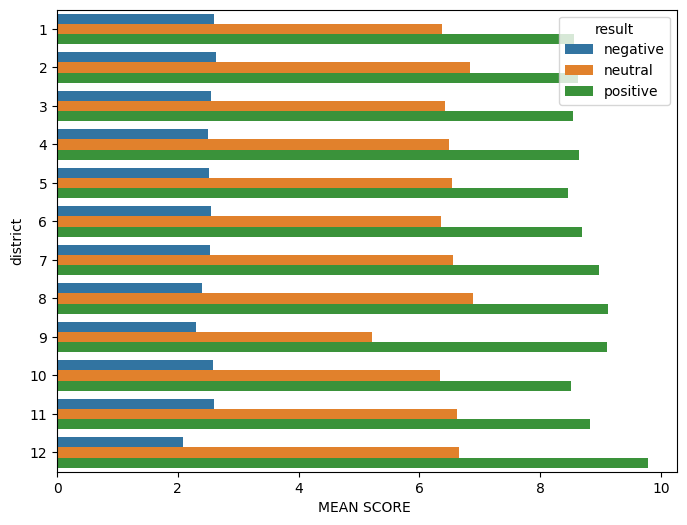

In [106]:
plt.figure(figsize=(8,6))
sns.barplot(data=summary_df_dist,y='district',x='rating_scaler',hue='result',orient='y')
plt.xlabel('MEAN SCORE ')
plt.show()

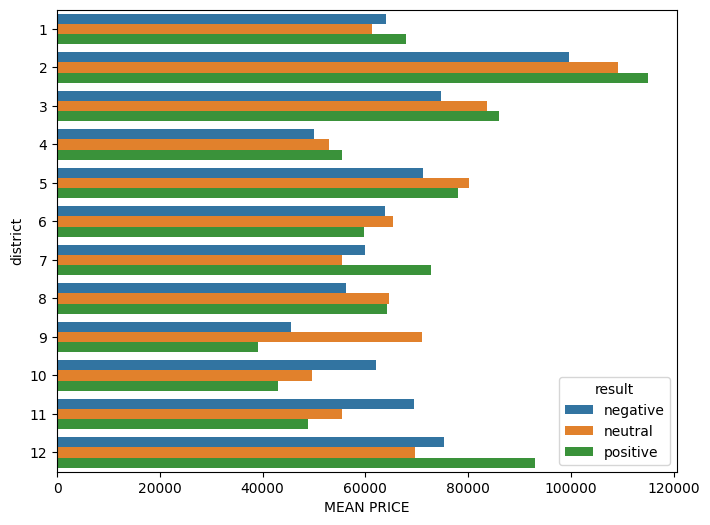

In [116]:
plt.figure(figsize=(8,6))
sns.barplot(data=summary_df_dist,
            y='district',
            x='avg_price',
            hue='result',
            orient='y')
plt.xlabel('MEAN PRICE')
plt.show()

In [114]:
summary_df_type_res = combined_df.groupby(['type_restaurant','result']).agg({'rating_scaler':'mean',
                                                                              'label':'count',
                                                                              'avg_price':'mean'}).reset_index().rename(columns={'label':'count_evaluation'})
summary_df_type_res.head()

,type_restaurant,result,rating_scaler,count_evaluation,avg_price
0,Casual,negative,2.549298,2108,57963.742884
1,Casual,neutral,6.430163,10276,55143.871643
2,Casual,positive,8.602414,15138,57628.936914
3,Normal,negative,2.614930,71,243316.901408
4,Normal,neutral,6.744172,489,238317.995910


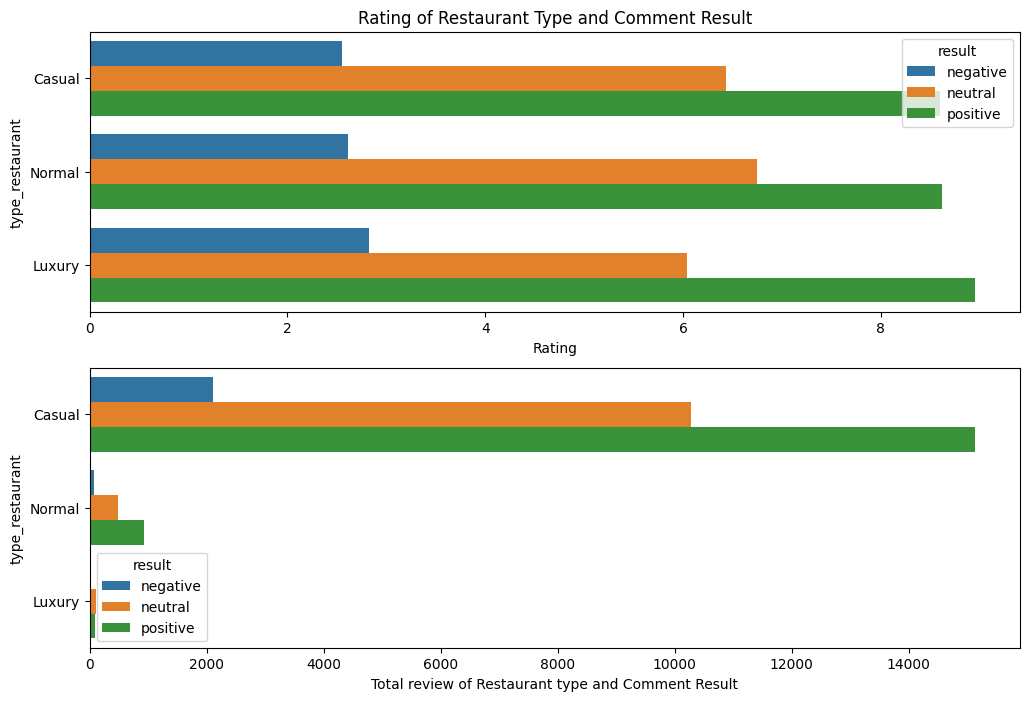

In [123]:
fig, ax = plt.subplots(2,1,figsize=(12,8))
sns.barplot(data=summary_df_type_res,
            y='type_restaurant',
            x='rating_scaler',
            hue='result',
            orient='y', 
            ax=ax[0])
ax[0].set_xlabel('Rating')
ax[0].title.set_text('Rating of Restaurant Type and Comment Result')

sns.barplot(data=summary_df_type_res,
            y='type_restaurant',
            x='count_evaluation',
            hue='result',
            orient='y', 
            ax=ax[1])
ax[1].set_xlabel('Total review of Restaurant type and Comment Result')

plt.show()

In [129]:
combined_df.drop(columns=['price_max','price_min','label']).to_csv('../Clean_data/combine_review_res.csv',index=False)